Checking shard_lengths in ['/home/matt/DATA/KTH/h5/shard_0001.hdf5']
h5: Opening /home/matt/DATA/KTH/h5/shard_0001.hdf5... h5: paths 1 ; shard_lengths [599] ; total 599
Dataset length: 479
479
torch.Size([10, 1, 64, 64]) tensor(0)
{0, 1, 2, 3, 4, 5}


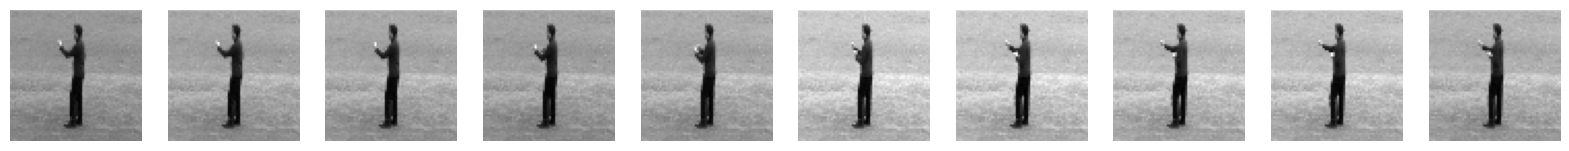

In [1]:
import sys
sys.path.append('..')

from datasets.kth import KTHDataset


data_path = '/home/matt/DATA/KTH/h5'

num_frames_cond = 10
num_frames_future = 0
video_frames_pred = 0
random_flip = True

# load the kth dataset and see what it produces
frames_per_sample = num_frames_cond + num_frames_future + video_frames_pred
dataset = KTHDataset(data_path, frames_per_sample=frames_per_sample, train=True,
                             random_time=True, random_horizontal_flip=random_flip)

print(len(dataset))

targets = set()
for i, (data, target) in enumerate(dataset):
    if i == 0:
        print(data.shape, target)
    targets.add(int(target))

print(targets)

import matplotlib.pyplot as plt
im = dataset[0][0]
fig = plt.figure(figsize=(20,5))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(im[i].permute(1, 2, 0), cmap='gray')
    plt.axis('off')

In [2]:
from datasets.dvs import DVSDataset
%load_ext autoreload
%autoreload 2

# Load the DVS dataset
dvs_data_path = '/home/matt/DATA/DVSGesture/videos_pos_64'
dvs_dataset = DVSDataset(dvs_data_path, train=True)

print(len(dvs_dataset))

Loading left_arm_clockwise


100%|██████████| 5/5 [00:00<00:00,  6.80it/s]


Loading left_arm_counter_clockwise


100%|██████████| 5/5 [00:00<00:00,  7.23it/s]


Loading left_hand_wave


100%|██████████| 5/5 [00:00<00:00,  7.67it/s]


Loading right_arm_clockwise


100%|██████████| 5/5 [00:00<00:00,  6.14it/s]


Loading right_arm_counter_clockwise


100%|██████████| 5/5 [00:00<00:00,  7.25it/s]


Loading right_arm_wave


100%|██████████| 5/5 [00:00<00:00,  8.16it/s]

Dataset length: 10163
10163


In [3]:
dvs_dataset[0][0].shape, dvs_dataset[0][1]

(torch.Size([5, 1, 64, 64]), tensor(0))

torch.Size([5, 1, 64, 64]) tensor(0)
{0, 1, 2, 3, 4, 5}


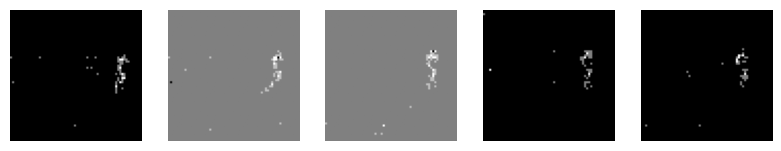

In [5]:
dvs_targets = set()
for i, (dvs_data, dvs_target) in enumerate(dvs_dataset):
    if i == 0:
        print(dvs_data.shape, dvs_target)
    dvs_targets.add(int(dvs_target))

print(dvs_targets)

# Visualize the first sample from the DVS dataset
dvs_im = dvs_dataset[0][0]
fig = plt.figure(figsize=(20, 5))
for i in range(5):
    plt.subplot(1, 10, i + 1)
    plt.imshow(dvs_im[i].permute(1, 2, 0), cmap='gray')
    plt.axis('off')